# Cell magic and Unix scripts

In this session we learn how to use specific magic functions and to interact with the operating system (OS). Here we assume you work with Linux and bash. 

 * Magic functions are special IPython features that allow you to control the behavior of IPython itself, plus a lot of system-type features. 
 * Several modules exist that allow to use functions of the operating system from Python.

The philosophy underlying Unix is that small programs ("Unix commands") do specific tasks like listing of a directory with "ls". Usually we interact with Unix on a command line shell (e.g. bash) in a terminal. Python is ideally suited to write executable scripts for special tasks and to extend the variety of commands available on the shell. 

Here we will briefly touch the following topics:

 * Executable scripts
 * Command line options
 * os and sys module
 * Search path and environmental settings

Further Reading: Python for Unix and Linux System Administration, O'Reilly

## IPython's 'magic' functions

There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument. 


## Interaction with Unix

### Module OS -  Miscellaneous operating system interfaces

The module OS provides a portable way of using operating system dependent functionality. 

### Module sys - System-specific parameters and functions

This module provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter.

#### Example:  sys.argv

The list of command line arguments passed to a Python script. argv[0] is the script name (it is operating system dependent whether this is a full pathname or not). If the command was executed using the -c command line option to the interpreter, argv[0] is set to the string '-c'. If no script name was passed to the Python interpreter, argv[0] is the empty string.

The module [getopt](https://docs.python.org/3.5/library/getopt.html) is useful in combination with sys.argv  and even more convenient is the module [argparse](https://docs.python.org/3.5/library/argparse.html) to write user-friendly command-line interfaces.


# Magic functions

In [4]:
%quickref 

Shows an Ipython quick reference

In [2]:
%magic

%magic shows an overview on magic functions. We can use the IPython help system to display the specific details of magic commands.

In [5]:
x=1
%whos 
#Print all interactive variables

Variable   Type    Data/Info
----------------------------
x          int     1


In [14]:
%pylab?

In [10]:
%pylab inline
#This function lets you activate pylab (matplotlib, numpy and interactive support) 
#inline activates inline plotting in notebooks, if omitted a new window will open.

Populating the interactive namespace from numpy and matplotlib


In [11]:
%matplotlib -l

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl', 'widget']


In [12]:
%matplotlib notebook # Allows interactive plotting, e.g. zooms

<IPython.core.display.Javascript object>


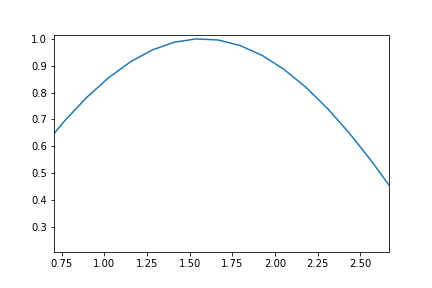

In [13]:
x=linspace(0,2*pi)
plot(x,sin(x))

# Executable scripts

In [15]:
%%writefile hello.py
#!/usr/bin/env python3
print("Hello Python")

Writing hello.py


In [16]:
!more hello.py

#!/usr/bin/env python3
print("Hello Python")


In [17]:
!chmod +x hello.py

In [18]:
!./hello.py

Hello Python


# Search path

In the above example we have to use the preceding ./ because the current directory (named .) is not in the search path. Otherwise the script can not be found.

For the following example we change to the Unix terminal. We create a directory named bin in the home directory (abbreviated with the tilde ~) and add this to the search path (stored in the bash environment variable PATH):
    
    mkdir ~/bin
    export PATH=$HOME/bin:$PATH
    cp hello.py ~/bin/


Show the search path with
    
    env | grep PATH
    

env displays all bash environment variables. The output is piped (|) to the Unix grep command which filters the output with matching keywords. 

Now the script shall be found by the Unix shell and may be directly executed with

    hello.py
    
If you want to add the search path to your environment permanently you may add the export statement at the end of your configuration file. You may also add other environment settings like "module load python"

    ~/.profile

For further information see https://www.cen.uni-hamburg.de/facilities/cen-it/software/unix/sw-guide.html
    


# Command line arguments
## Example script - pdf compressor

In [19]:
%%writefile pdfcompress.py
#!/usr/bin/env python3
import os,sys

filename1=sys.argv[1]
filename2=filename1.replace('.pdf','_small.pdf')

os.system('gs -sDEVICE=pdfwrite -dCompatibilityLevel=1.4 \
          -dPDFSETTINGS=/ebook -dNOPAUSE -dQUIET -dBATCH \
          -sOutputFile='+filename2+' '+filename1)

Writing pdfcompress.py


Populating the interactive namespace from numpy and matplotlib


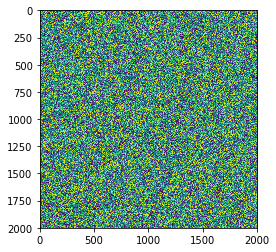

In [20]:
%pylab inline
imshow(rand(2000,2000)) # Make some noise
savefig('test_img.pdf',dpi=300)

In [21]:
ls -sh test_img.pdf

2.4M test_img.pdf


In [25]:
!pdfcompress.py test_img.pdf

In [26]:
ls -sh test_img_small.pdf

568K test_img_small.pdf


## Exercise


 * Add the environment settings for the search path and python version to your configuration file .profile

 * Make the script pdfcompress.py executable and test it.

 * Look up ghostscript options /ebook and /screen. What is the meaning?

 * Modify the script that it overwrites the input file. Advanced: ask for user input to override file or not.